<a href="https://colab.research.google.com/github/VaideswarReddy/Demanad-prediction-for-public-transport/blob/main/Vaideswar_Reddy_Team_5_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Data _ Resources/train_revised.csv')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.dtypes

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [ ]:
# df['travel_time'] = pd.to_datetime(df['travel_time'], format='%H:%M')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.shape

(51645, 10)

In [ ]:
df.payment_method.value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [ ]:
df.ride_id.value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
         ..
5804      1
9834      1
9738      1
11755     1
6147      1
Name: ride_id, Length: 6249, dtype: int64

In [ ]:
df.seat_number.value_counts()

1      2065
8      1818
10     1789
2      1784
7      1782
       ... 
25      511
23B     508
1A      273
2A      173
14        1
Name: seat_number, Length: 61, dtype: int64

In [ ]:
df.travel_time.value_counts()

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
         ... 
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

In [ ]:
df.travel_from.value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [ ]:
df.groupby(['car_type','seat_number'])['seat_number'].value_counts()

car_type  seat_number  seat_number
Bus       10A          10A             681
          10B          10B             590
          11A          11A             774
          11B          11B             544
          12A          12A             716
                                      ... 
shuttle   5            5              1762
          6            6              1776
          7            7              1781
          8            8              1817
          9            9              1759
Name: seat_number, Length: 64, dtype: int64

In [ ]:
df.groupby(['car_type','travel_time'])['travel_time'].value_counts()

car_type  travel_time  travel_time
Bus       19:03        19:03           334
          19:04        19:04           402
          19:05        19:05           207
          19:06        19:06           199
          19:07        19:07          3227
                                      ... 
shuttle   9:10         9:10            646
          9:20         9:20            660
          9:30         9:30            630
          9:40         9:40            589
          9:50         9:50            520
Name: travel_time, Length: 85, dtype: int64

In [ ]:

df.groupby(['car_type','ride_id'])['ride_id'].value_counts()

car_type  ride_id  ride_id
Bus       1442     1442        1
          5437     5437        1
          5710     5710        1
          5777     5777        5
          5778     5778       31
                              ..
shuttle   13804    13804       1
          13805    13805       1
          20113    20113       9
          20115    20115       5
          20116    20116       1
Name: ride_id, Length: 6249, dtype: int64

In [ ]:
df.groupby(['ride_id','travel_from'])['travel_from'].count()

ride_id  travel_from
1442     Migori          1
5437     Migori          1
5710     Keroka          1
5777     Homa Bay        5
5778     Migori         31
                        ..
20113    Kisii           9
20114    Kisii           4
20115    Kisii           5
20116    Kisii           1
20117    Kisii           1
Name: travel_from, Length: 6249, dtype: int64

In [ ]:
df.groupby(['travel_from','ride_id'])['ride_id'].value_counts()

travel_from  ride_id  ride_id
Awendo       6654     6654       2
             8380     8380       1
             8381     8381       7
             8397     8397       5
             8409     8409       3
                                ..
Sori         13653    13653      1
             13707    13707      4
             13708    13708      3
             13773    13773      2
             13774    13774      1
Name: ride_id, Length: 6249, dtype: int64

In [ ]:
df.groupby(['car_type','travel_date'])['car_type'].value_counts()

car_type  travel_date  car_type
Bus       01-01-18     Bus          52
          01-02-18     Bus         221
          01-03-18     Bus         248
          01-04-18     Bus         248
          01-12-17     Bus          21
                                  ... 
shuttle   30-11-17     shuttle      74
          30-12-17     shuttle      10
          31-01-18     shuttle     170
          31-03-18     shuttle      18
          31-12-17     shuttle       5
Name: car_type, Length: 292, dtype: int64

In [ ]:
df.travel_date.value_counts()

10-12-17    856
14-12-17    797
13-12-17    730
07-12-17    723
08-12-17    722
           ... 
25-12-17      8
17-10-17      1
14-11-17      1
26-11-17      1
19-11-17      1
Name: travel_date, Length: 149, dtype: int64

In [ ]:
df.ride_id.value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
         ..
5804      1
9834      1
9738      1
11755     1
6147      1
Name: ride_id, Length: 6249, dtype: int64

In [ ]:
df.dtypes

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [ ]:
df.car_type.value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [ ]:
df.payment_method.value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

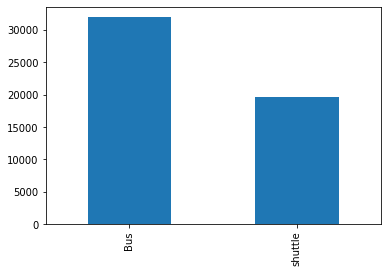

In [ ]:
df.car_type.value_counts().plot.bar()

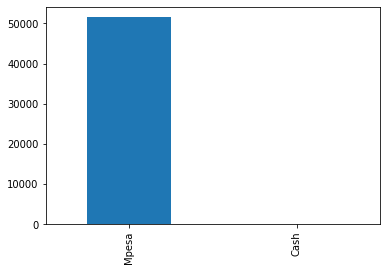

In [ ]:
df.payment_method.value_counts().plot.bar()

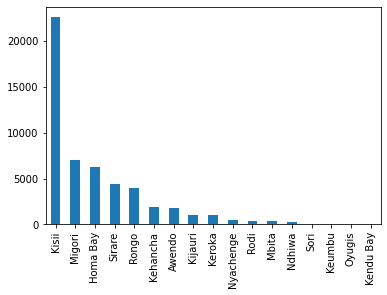

In [ ]:
df.travel_from.value_counts().plot.bar()

In [ ]:
df['travel_date'][0][6:8]

'17'

In [ ]:
df['travel_month_date'] = df['travel_date'].astype(str).str[:2]
df['travel_month'] = df['travel_date'].astype(str).str[3:5]
df['travel_year'] = df['travel_date'].astype(str).str[6:8]

In [ ]:

df.travel_year.value_counts()

18    37945
17    13700
Name: travel_year, dtype: int64

In [ ]:
df.travel_month.value_counts()

12    12768
02    12315
03    10876
01     7830
04     6924
11      931
10        1
Name: travel_month, dtype: int64

In [ ]:
df.travel_month_date.value_counts()

13    2332
12    2252
09    2225
08    2210
14    2184
11    2158
07    2150
10    2019
19    1999
18    1978
04    1972
16    1954
06    1953
15    1881
28    1878
05    1810
17    1704
01    1664
20    1652
27    1549
02    1541
22    1517
21    1512
23    1352
29    1335
03    1102
24     950
26     865
25     677
30     636
31     634
Name: travel_month_date, dtype: int64

In [ ]:
df[['travel_time_hrs','travel_time_mins']] = df.travel_time.str.split(":",expand=True)

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_month_date,travel_month,travel_year,travel_time_hrs,travel_time_mins
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,17,10,17,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,19,11,17,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,26,11,17,7,05
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,27,11,17,7,10
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,27,11,17,7,12


In [ ]:
# df.travel_month.astype(int)

In [ ]:
# df['travel_month'] = df[['travel_date'][:4]]

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_month
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017-10-17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017-11-26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017-11-27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017-11-27


In [ ]:
df.travel_from.unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [ ]:
df_pr = df.copy()

In [ ]:
df_pr.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_month_date,travel_month,travel_year,travel_time_hrs,travel_time_mins
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,17,10,17,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,19,11,17,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,26,11,17,7,05
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,27,11,17,7,10
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,27,11,17,7,12


In [ ]:
df_pr.drop(columns=['payment_receipt','travel_to','seat_number','travel_date','travel_time'],inplace=True)

In [ ]:
encoder_nums = {"car_type":{"Bus":0,"shuttle":1},
                 "travel_from":{"Migori":0,"Keroka":1,"Homa Bay":2,"Kisii":3,"Keumbu":4, "Rongo":5,"Kijauri":6, "Oyugis":7, "Awendo":8, "Sirare":9, "Nyachenge":10, "Kehancha":11, "Kendu Bay":12, "Sori":13, "Rodi":14, "Mbita":15, "Ndhiwa":16},
                 "payment_method":     {"Mpesa": 0, "Cash": 1},
                 "travel_year": {"17":2017, "18":2018}
                 
                 }

In [ ]:
df_pr = df_pr.replace(encoder_nums)

In [ ]:
df_pr.head()

,ride_id,payment_method,travel_from,car_type,max_capacity,travel_month_date,travel_month,travel_year,travel_time_hrs,travel_time_mins
0,1442,0,0,0,49,17,10,2017,7,15
1,5437,0,0,0,49,19,11,2017,7,12
2,5710,0,1,0,49,26,11,2017,7,05
3,5777,0,2,0,49,27,11,2017,7,10
4,5778,0,0,0,49,27,11,2017,7,12


In [ ]:
# df_pr['travel_month_date'].astype(int)
# df_pr['travel_month'].astype(int)
# df_pr.astype(int)

In [ ]:
df_pr = df_pr.astype(int)

In [ ]:
df_pr.dtypes

ride_id              int64
payment_method       int64
travel_from          int64
car_type             int64
max_capacity         int64
travel_month_date    int64
travel_month         int64
travel_year          int64
travel_time_hrs      int64
travel_time_mins     int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

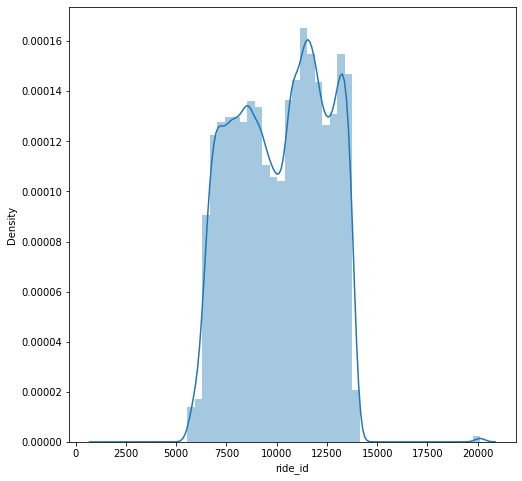

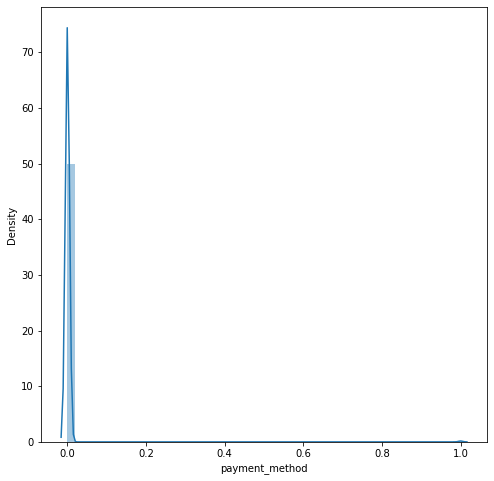

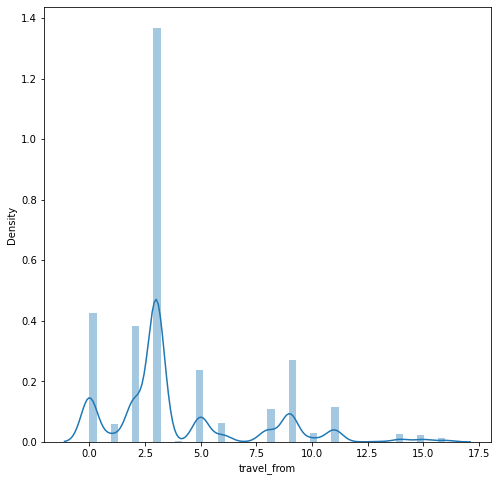

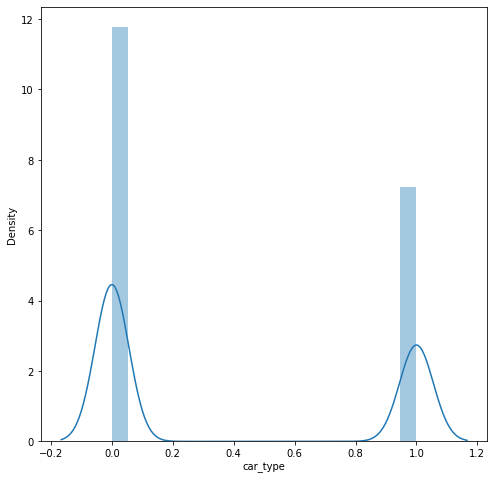

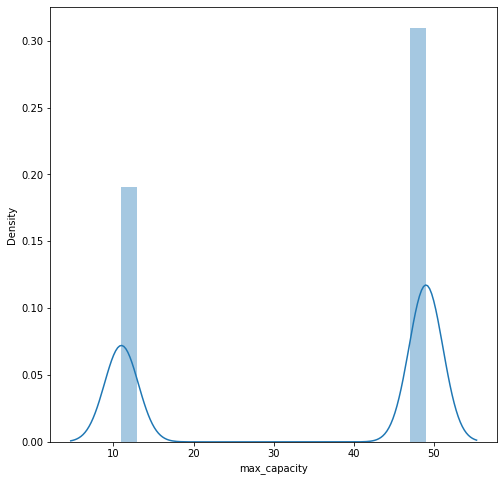

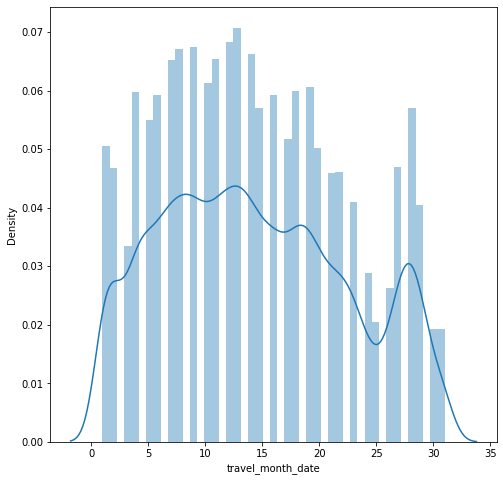

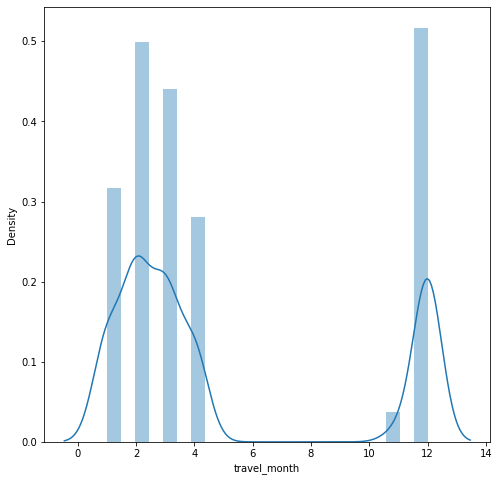

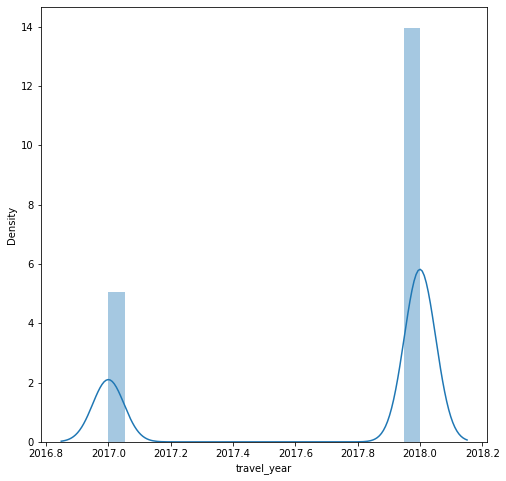

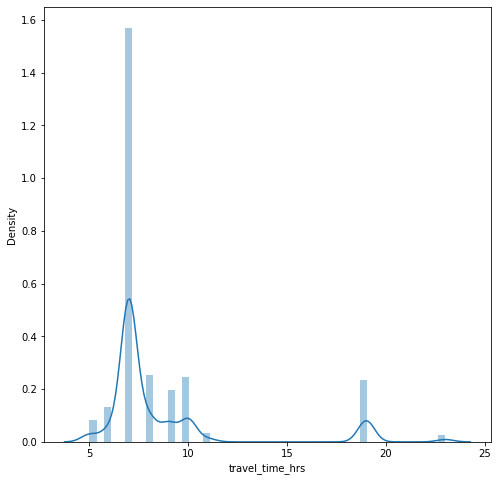

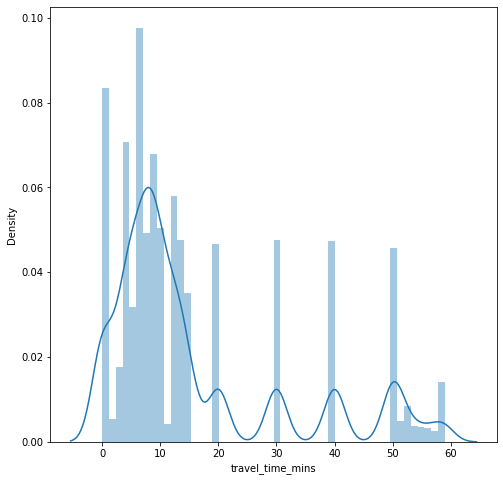

In [ ]:
for col in df_pr.columns:
  plt.figure(figsize=(8,8))
  sns.distplot(df_pr[col])


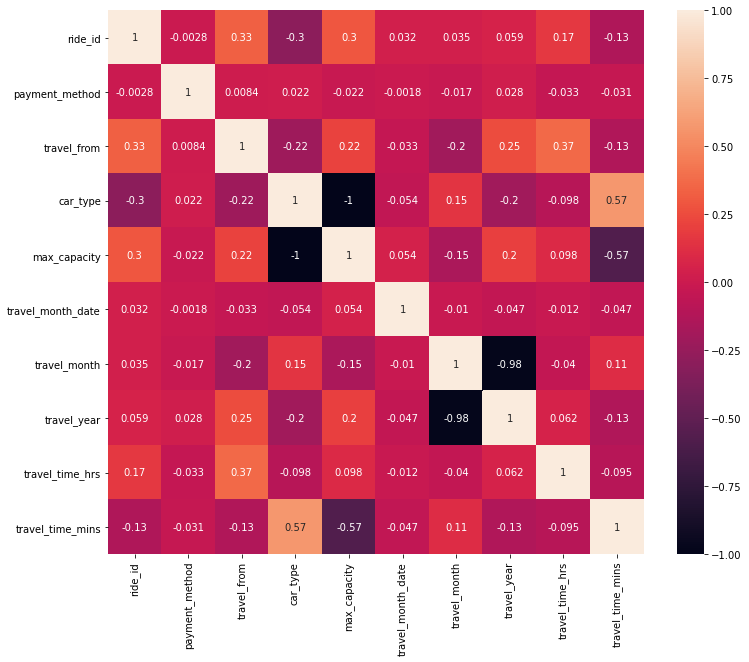

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_pr.corr(),annot= True)

Text(0, 0.5, 'travel_time_hrs')

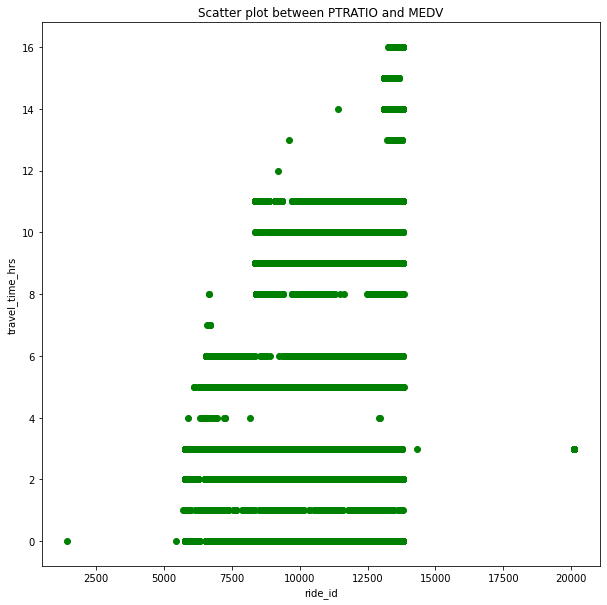

In [ ]:
# for col in df_pr.columns:
plt.figure(figsize=(10,10))
x = df_pr['ride_id']
y = df_pr['travel_from']
plt.scatter(x, y,color='green')
plt.title('Scatter plot between PTRATIO and MEDV')
plt.xlabel('ride_id')
plt.ylabel('travel_time_hrs')

In [ ]:
dependent_variable = 'ride_id'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(df_pr.columns.tolist()) - {dependent_variable})

In [ ]:
# Create the data of independent variables
X = df_pr[independent_variables].values

# Create the dependent variable data
y = df_pr[dependent_variable].values

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import math

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

1836.5161488659764

In [ ]:
r2_score(y_test, y_pred)

0.30355098440813155

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Data _ Resources/train_revised.csv')

In [ ]:
df2.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
ride_id_dict = {} 
for ride_id in df2["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1


In [ ]:
ride_id_dict

{1442: 1,
 5437: 1,
 5710: 1,
 5777: 5,
 5778: 31,
 5781: 26,
 5784: 1,
 5789: 1,
 5790: 2,
 5791: 1,
 5792: 1,
 5793: 1,
 5794: 2,
 5795: 1,
 5796: 2,
 5797: 3,
 5798: 1,
 5800: 2,
 5801: 11,
 5802: 3,
 5803: 11,
 5804: 1,
 5808: 2,
 5809: 1,
 5810: 1,
 5811: 1,
 5812: 1,
 5816: 1,
 5817: 1,
 5822: 1,
 5823: 2,
 5824: 1,
 5825: 1,
 5826: 1,
 5830: 1,
 5834: 1,
 5835: 2,
 5836: 1,
 5837: 1,
 5838: 1,
 5839: 1,
 5840: 1,
 5844: 1,
 5845: 1,
 5849: 1,
 5850: 1,
 5851: 1,
 5852: 1,
 5853: 1,
 5856: 11,
 5857: 4,
 5858: 11,
 5861: 1,
 5862: 1,
 5863: 1,
 5864: 1,
 5867: 9,
 5868: 6,
 5873: 1,
 5874: 5,
 5875: 3,
 5876: 1,
 5878: 2,
 5880: 11,
 5881: 1,
 5882: 4,
 5886: 1,
 5887: 1,
 5888: 1,
 5889: 1,
 5890: 1,
 5894: 11,
 5897: 11,
 5898: 1,
 5899: 1,
 5901: 11,
 5902: 5,
 5910: 11,
 5918: 1,
 5919: 1,
 5920: 1,
 5921: 1,
 5922: 1,
 5923: 1,
 5924: 1,
 5925: 1,
 5928: 1,
 5929: 8,
 5931: 1,
 5933: 1,
 5940: 1,
 5941: 3,
 5942: 1,
 5943: 1,
 5944: 1,
 5945: 1,
 5946: 1,
 5947: 11,
 5950: 1

In [ ]:
df_processed = df2.drop(['seat_number', 'payment_method', 'payment_receipt', 'travel_to'], axis=1)

In [ ]:
df_processed.drop_duplicates(inplace=True)
df_processed.reset_index(drop= True, inplace=True)

In [ ]:
df_processed["number_of_tickets"]= np.zeros(len(df_processed))

In [ ]:
for i in range(len(df_processed)):
    ride_id = df_processed.loc[i]["ride_id"]
    df_processed.at[i,"number_of_tickets"] = ride_id_dict[ride_id]

In [ ]:
df_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,17-10-17,7:15,Migori,Bus,49,1.0
1,5437,19-11-17,7:12,Migori,Bus,49,1.0
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5.0
4,5778,27-11-17,7:12,Migori,Bus,49,31.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import roc_auc_score
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,17-10-17,7:15,Migori,Bus,49,1.0
1,5437,19-11-17,7:12,Migori,Bus,49,1.0
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5.0
4,5778,27-11-17,7:12,Migori,Bus,49,31.0


In [ ]:
df_processed.describe()

,ride_id,max_capacity,number_of_tickets
count,6249.000000,6249.000000,6249.000000
mean,9963.644583,30.392223,8.264522
std,2296.304872,18.997471,8.632968
min,1442.000000,11.000000,1.000000
25%,7989.000000,11.000000,2.000000
50%,10024.000000,49.000000,7.000000
75%,11917.000000,49.000000,11.000000
max,20117.000000,49.000000,50.000000


In [ ]:
# df_train_set.drop(['ride_id'], axis=1, inplace=True) #ride_id is unnecessary in training set

In [ ]:
df_processed["travel_date"] = pd.to_datetime(df_processed["travel_date"],infer_datetime_format=True)
df_processed['travel_month'] = df_processed.travel_date.dt.month
df_processed['travel_dayof_year'] = df_processed.travel_date.dt.dayofyear
df_processed["travel_date"] = df_processed["travel_date"].dt.dayofweek 
#remember change the full date to day of week
#add travel season eg rainny,dry etc, school going season

In [ ]:
df_processed["car_type"] = pd.Categorical(df_processed["car_type"])
car_type_categories = df_processed.car_type.cat.categories
df_processed["car_type"] = df_processed.car_type.cat.codes

In [ ]:
df_processed["travel_from"] = pd.Categorical(df_processed["travel_from"])
travel_from_categories = df_processed.travel_from.cat.categories
df_processed["travel_from"] = df_processed.travel_from.cat.codes

In [ ]:
#express travel time in minutes
df_processed["travel_time"] = df_processed["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [ ]:
df_processed.corr()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,travel_month,travel_dayof_year
ride_id,1.000000,0.016338,0.103864,0.065618,-0.257885,0.257885,0.093817,0.029872,0.033685
travel_date,0.016338,1.000000,0.022232,0.007310,-0.030175,0.030175,0.001035,0.031918,0.028249
travel_time,0.103864,0.022232,1.000000,0.145781,-0.019499,0.019499,0.205832,0.041282,0.040311
travel_from,0.065618,0.007310,0.145781,1.000000,-0.203815,0.203815,-0.027875,-0.024963,-0.025947
car_type,-0.257885,-0.030175,-0.019499,-0.203815,1.000000,-1.000000,-0.208762,0.085932,0.086896
max_capacity,0.257885,0.030175,0.019499,0.203815,-1.000000,1.000000,0.208762,-0.085932,-0.086896
number_of_tickets,0.093817,0.001035,0.205832,-0.027875,-0.208762,0.208762,1.000000,0.030389,0.028571
travel_month,0.029872,0.031918,0.041282,-0.024963,0.085932,-0.085932,0.030389,1.000000,0.997150
travel_dayof_year,0.033685,0.028249,0.040311,-0.025947,0.086896,-0.086896,0.028571,0.997150,1.000000


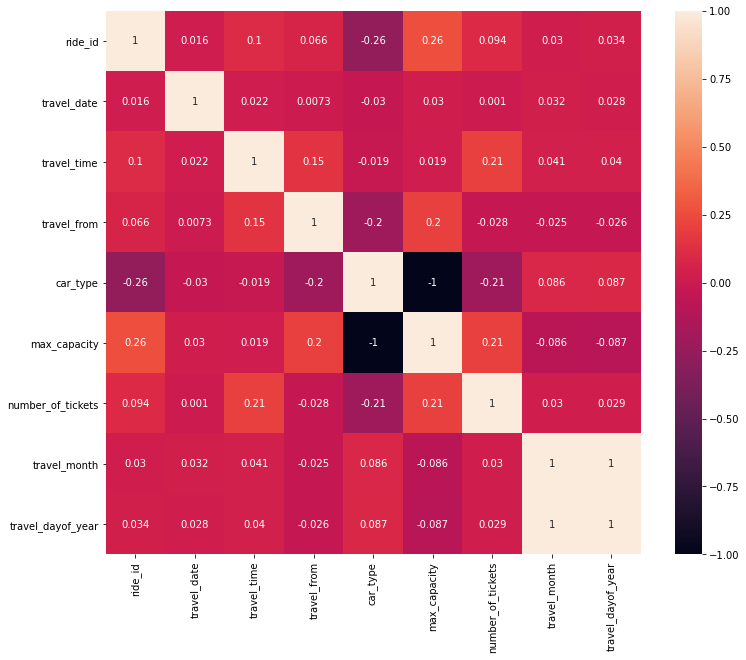

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_processed.corr(),annot= True)

In [ ]:
X = df_processed.drop(["number_of_tickets"], axis=1)
y = df_processed.number_of_tickets

In [ ]:
# from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
preds_train_set = model.predict(X_train)

In [ ]:
from numpy import math

In [ ]:
accuracy = model.score(X_train,y_train)
accuracy_test = model.score(X_test,y_test)

print(f'The accuracy of the train dataset is : {accuracy}')
print(f'The accuracy of the test dataset is : {accuracy_test}')

The accuracy of the train dataset is : 0.10492711160627888
The accuracy of the test dataset is : 0.06490235261004396


In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [ ]:
print_metrics(y_train, y_train_pred)

MSE is 66.33303196990677
RMSE is 8.144509314250108
RMSE is 0.10492711160627888
MAE is 5.939084535774763
MAPE is 220.11707330227298


In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 71.19114494386439
RMSE is 8.437484515177754
RMSE is 0.06490235261004396
MAE is 6.162944812929949
MAPE is 235.7782413521052


In [ ]:
print (explained_variance_score(y_train,preds_train_set)) #best is 1.0

0.10492711160627899


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_test_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : -0.0014256885340895309
Adjusted R2 :  -0.007881293294986103


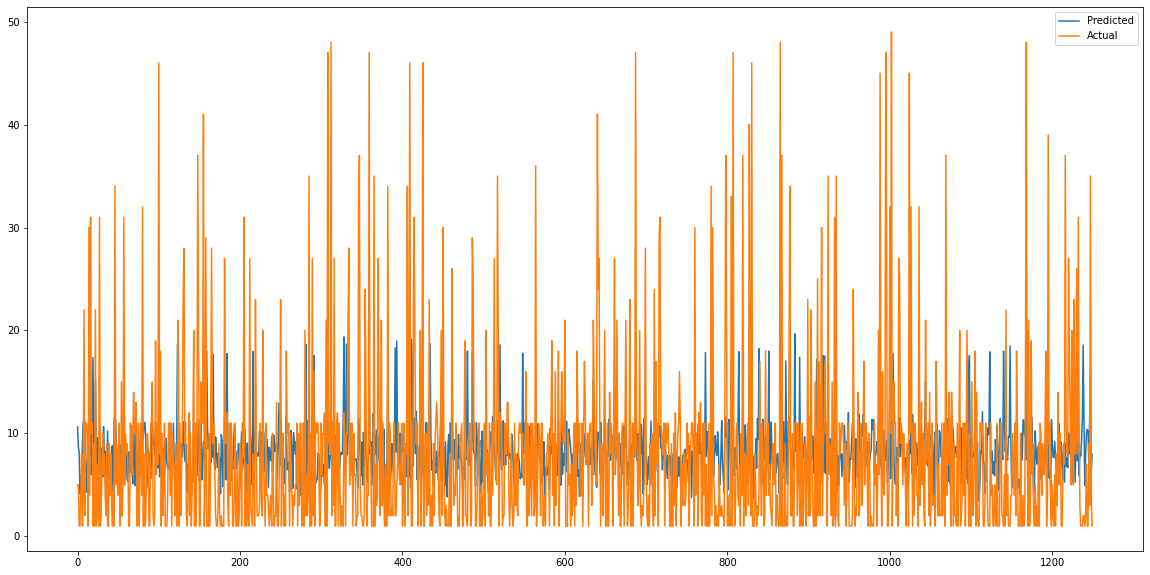

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.10456907485927547

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.244032160000001e+94
RMSE : 2.87124226773012e+47
R2 : -0.0014256885340895309
Adjusted R2 :  -0.007881293294986103


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111527.70945805607, tolerance: 25.002985234093646
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109441.12531677837, tolerance: 24.509466846684653
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110419.07059366771, tolerance: 24.58159621962196
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111527.

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -66.45012780556249


# <b> Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.10492711159198308

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.244032160000001e+94
RMSE : 2.87124226773012e+47
R2 : -0.0014256885340895309
Adjusted R2 :  -0.007881293294986103


# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.3886e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.01758e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.28804e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.3853e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.45851e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgW

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -66.50961307156575


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.244032160000001e+94
RMSE : 2.87124226773012e+47
R2 : -0.0014256885340895309
Adjusted R2 :  -0.007881293294986103


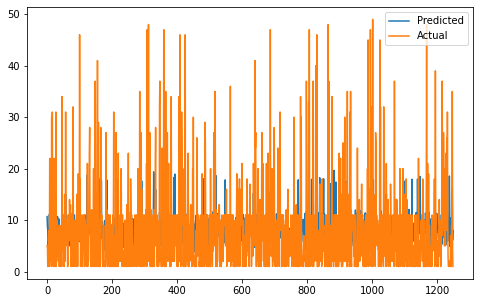

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import roc_auc_score
import datetime as dt
import matplotlib.pyplot as plt

In [94]:
df_raw = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Data _ Resources/train_revised.csv')

In [95]:
df_raw["payment_method"].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [96]:
df_raw["travel_to"].value_counts()

Nairobi    51645
Name: travel_to, dtype: int64

In [97]:
ride_id_dict = {} 
for ride_id in df_raw["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [98]:
df_processed = df_raw.drop(['seat_number', 'payment_method', 'payment_receipt', 'travel_to'], axis=1)

In [99]:
df_processed.drop_duplicates(inplace=True)
df_processed.reset_index(drop= True, inplace=True)

In [100]:
df_processed["number_of_tickets"]= np.zeros(len(df_processed))

In [101]:
for i in range(len(df_processed)):
    ride_id = df_processed.loc[i]["ride_id"]
    df_processed.at[i,"number_of_tickets"] = ride_id_dict[ride_id]

In [102]:
df_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,17-10-17,7:15,Migori,Bus,49,1.0
1,5437,19-11-17,7:12,Migori,Bus,49,1.0
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5.0
4,5778,27-11-17,7:12,Migori,Bus,49,31.0


In [104]:
df_processed.describe()

,ride_id,max_capacity,number_of_tickets
count,6249.000000,6249.000000,6249.000000
mean,9963.644583,30.392223,8.264522
std,2296.304872,18.997471,8.632968
min,1442.000000,11.000000,1.000000
25%,7989.000000,11.000000,2.000000
50%,10024.000000,49.000000,7.000000
75%,11917.000000,49.000000,11.000000
max,20117.000000,49.000000,50.000000


In [106]:
# df_train_set.drop(['ride_id'], axis=1, inplace=True) #ride_id is unnecessary in training set


In [108]:
df_processed["travel_date"] = pd.to_datetime(df_processed["travel_date"],infer_datetime_format=True)
df_processed['travel_month'] = df_processed.travel_date.dt.month
df_processed['travel_dayof_year'] = df_processed.travel_date.dt.dayofyear
df_processed["travel_date"] = df_processed["travel_date"].dt.dayofweek 
#remember change the full date to day of week
#add travel season eg rainny,dry etc, school going season

In [109]:
df_processed["car_type"] = pd.Categorical(df_processed["car_type"])
car_type_categories = df_processed.car_type.cat.categories
df_processed["car_type"] = df_processed.car_type.cat.codes

In [110]:
df_processed["travel_from"] = pd.Categorical(df_processed["travel_from"])
travel_from_categories = df_processed.travel_from.cat.categories
df_processed["travel_from"] = df_processed.travel_from.cat.codes

In [111]:
#express travel time in minutes
df_processed["travel_time"] = df_processed["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [112]:
df_processed.corr()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,travel_month,travel_dayof_year
ride_id,1.000000,0.016338,0.103864,0.065618,-0.257885,0.257885,0.093817,0.029872,0.033685
travel_date,0.016338,1.000000,0.022232,0.007310,-0.030175,0.030175,0.001035,0.031918,0.028249
travel_time,0.103864,0.022232,1.000000,0.145781,-0.019499,0.019499,0.205832,0.041282,0.040311
travel_from,0.065618,0.007310,0.145781,1.000000,-0.203815,0.203815,-0.027875,-0.024963,-0.025947
car_type,-0.257885,-0.030175,-0.019499,-0.203815,1.000000,-1.000000,-0.208762,0.085932,0.086896
max_capacity,0.257885,0.030175,0.019499,0.203815,-1.000000,1.000000,0.208762,-0.085932,-0.086896
number_of_tickets,0.093817,0.001035,0.205832,-0.027875,-0.208762,0.208762,1.000000,0.030389,0.028571
travel_month,0.029872,0.031918,0.041282,-0.024963,0.085932,-0.085932,0.030389,1.000000,0.997150
travel_dayof_year,0.033685,0.028249,0.040311,-0.025947,0.086896,-0.086896,0.028571,0.997150,1.000000


In [113]:
X = df_processed.drop(["number_of_tickets"], axis=1)
y = df_processed.number_of_tickets

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
model = RandomForestRegressor()

In [116]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
preds_train_set = model.predict(X_test)

In [83]:
preds_test_set = model.predict(X_test)

In [121]:
accuracy = model.score(X_train,y_train)
accuracy_test = model.score(X_test,y_test)

print(f'The accuracy of the train dataset is : {accuracy}')
print(f'The accuracy of the test dataset is : {accuracy_test}')

The accuracy of the train dataset is : 0.9523530109690526
The accuracy of the test dataset is : 0.6787940297350479
